# Introduction to Python for Open Source Geocomputation

![python](pics/python-logo-master-v3-TM.png)

* Instructor: Dr. Wei Kang
* Class Location and Time: ENV 336, Mon & Wed 12:30 pm - 1:50 pm

Content:

* What is Matplotlib?
* Options with Matplotlib
    * Different plot types
    * Styling
    * multiple plots
* Saving a plotted figure

# What is Matplotlib?


<img src="pics/matplotlib.jpg" width=300>

* One of the most popular packages for quickly creating figures in python
* Many packages are built on top of and extending Matplotlib
    * Examples
        * pandas: Tabular data analysis and manipulation tool providing a .plot() API for Matplotlib plotting.
        * animatplot: 	Interactive animated plots.
        * seaborn: 	High-level interface for drawing attractive statistical graphics.
        * GeoPandas: Pandas extended to support geographical data, algorithms, and visualization
    * See a fuller list [here](https://matplotlib.org/mpl-third-party/)

## Installation of Matplotlib

From a terminal:

`pip install matplotlib`

or

`conda install matplotlib`

`matplotlib` is included in conda installation, so our working environment should already have `matplotlib` installed.

## Support Many Different Types of Plots

* Basic plots: lines, scatter plot, bar plot
* image plots
* statistical plots: histogram, boxplot, pie
* 3D plots

In [1]:
from IPython.display import IFrame
IFrame(src="https://matplotlib.org/stable/plot_types/index.html", width=1000, height=550)

## Creating a simple figure in Matplotlib

Two interfaces for plotting with Matplotlib 

* implicit interface:
    * procedural approach
    * inspired by and modeled on MATLAB
    * uses an global state-based interface which is is encapsulated in the `pyplot` module to plot to the "current Axes"
    * use `functions`
    * See the [pyplot tutorials](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for a more in-depth look at the pyplot interface.
* explicit interface:
    * object-oriented (OO) interface
    * directly utilize instances of `axes.Axes` to build up the visualization in an instance of `figure.Figure`
    * use `methods` associated with instances of classes `axes.Axes` and `figure.Figure`

In [2]:
import matplotlib.pyplot as plt #import the pyplot module from matplotlib

In [3]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_docstring',
 '_draw_all_if_interactive',
 '_get_backend_mod',
 '_get_pyplot_commands

In [4]:
import numpy as np

In [5]:
x = np.arange(10)
y = x * 2

In [6]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
y

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### Explicit interface

This interface works by 

* instantiating an instance of a Figure class (fig below)
* using a method subplots method (or similar) on that object to create one or more Axes objects (ax below)
* then calling drawing methods on the Axes (plot in this example)

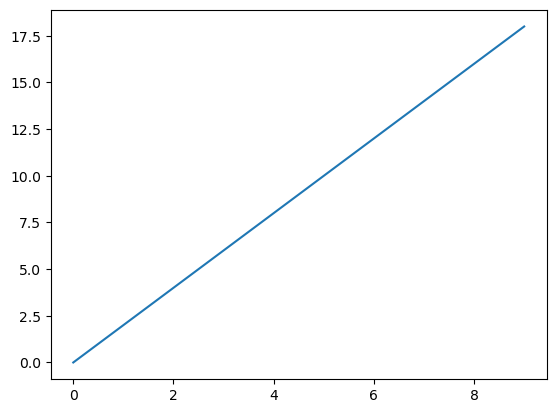

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single axes. 
ax.plot(x, y)  # Plot some data on the axes.

#### implicit interface

* shadows most of the Axes plotting methods to give the equivalent of the above
* the creation of the Figure and Axes is done for the user

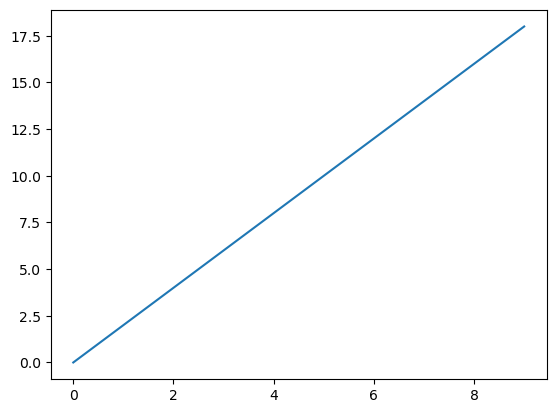

In [9]:
plt.plot(x,y)

## Anatamy of a Matplotlib Figure 

<img src="pics/matplotlib_anatomy.jpg" width=800>

### `Figure` and `Axes`

* `Axes`: 
    * represent an individual plot 
    * differnt from "axis", which refers to the x/y axis of a plot
* `Figure`: the final image that may contain 1 or more `Axes`
* Syntax for creating `Figure` and `Axes`
    * `fig = plt.figure()  # an empty figure with no Axes`
    * `fig, ax = plt.subplots()  # a figure with a single Axes`
    * `fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes`

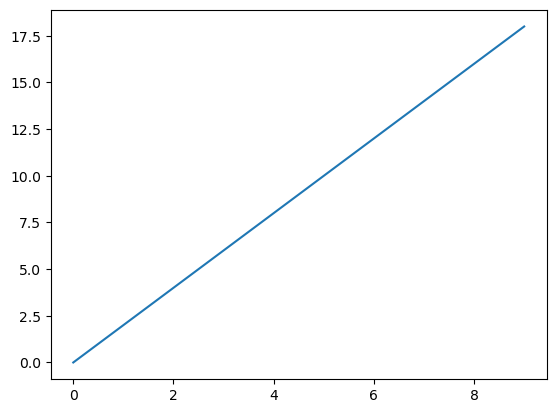

In [10]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)  # Plot some data on the axes.

Text(0, 0.5, 'Y = X*2')

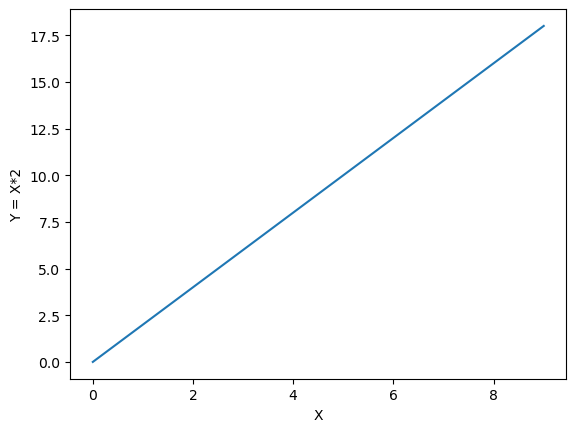

In [11]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)  # Plot some data on the axes.
ax.set_xlabel("X")
ax.set_ylabel("Y = X*2")

What it we want to add another line to the current plot?

Text(0, 0.5, 'Y')

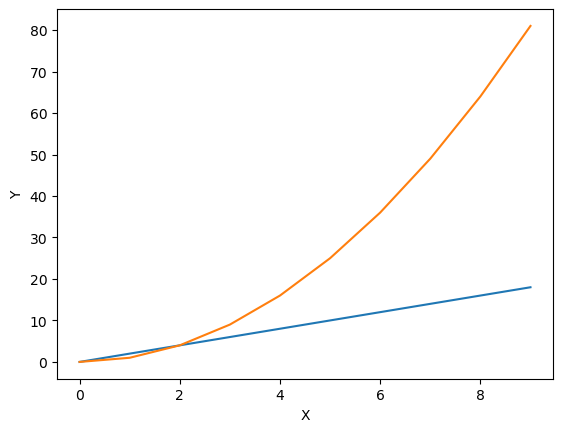

In [12]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y)  # Plot some data on the axes.


y2 = x ** 2
ax.plot(x, y2)  # Plot some data on the axes.

ax.set_xlabel("X")
ax.set_ylabel("Y")


add legend to different different lines

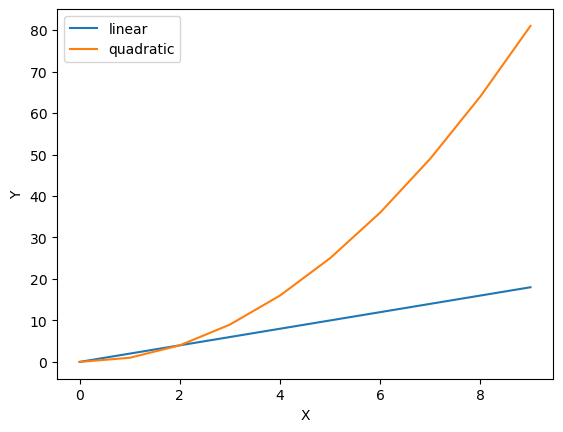

In [13]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = np.arange(10)
y = x * 2
ax.plot(x, y, label='linear')  

y2 = x ** 2
ax.plot(x, y2, label='quadratic')  # Plot some data on the axes.

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

add a third line

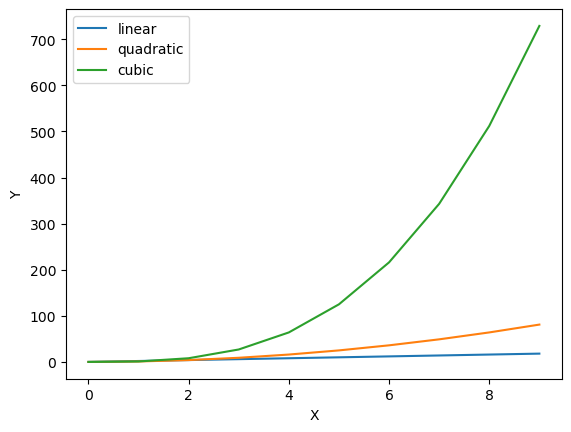

In [14]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = np.arange(10)
y = x * 2
ax.plot(x, y, label='linear')  

y2 = x ** 2
ax.plot(x, y2, label='quadratic')  # Plot some data on the axes.

y3 = x ** 3
ax.plot(x, y3, label='cubic')  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

### Styling Artists

`Axes`'s plotting methods have styling options for:

* color
* linewidth
* [linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

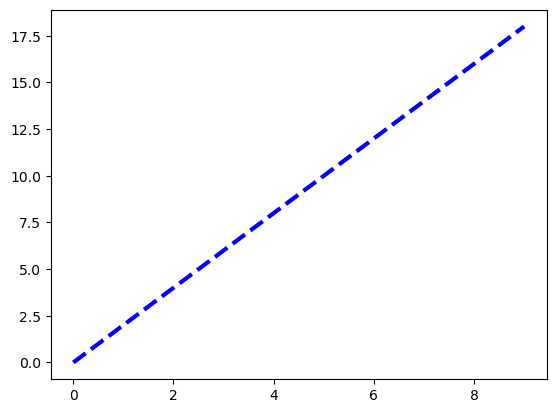

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y, color='blue', linewidth=3, linestyle='--')

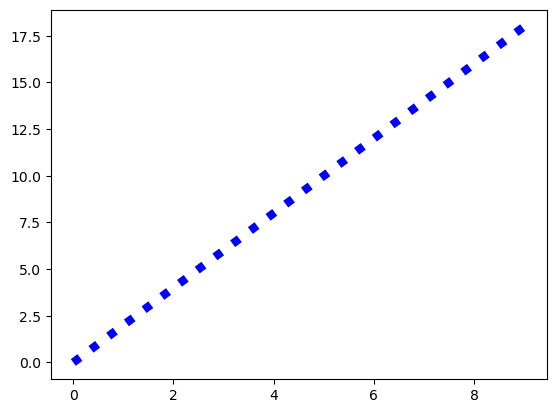

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y, color='blue', linewidth=6, linestyle=':')

### Group exercise

Edit the following python program to change the style ([color](https://matplotlib.org/stable/gallery/color/named_colors.html), linewidth, [linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)) of the three plotted lines

```python
fig, ax = plt.subplots()  
x = np.arange(10)
y = x * 2
ax.plot(x, y, label='linear')  

y2 = x ** 2
ax.plot(x, y2, label='quadratic') 

y3 = x ** 3
ax.plot(x, y3, label='cubic')  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

```

> when you are done, raise your hand!

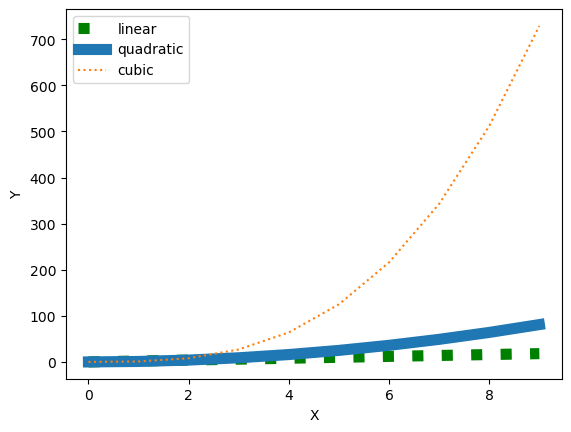

In [17]:
fig, ax = plt.subplots()  
x = np.arange(10)
y = x * 2
ax.plot(x, y, label='linear', color="green", linewidth = 8, linestyle = "dotted")  

y2 = x ** 2
ax.plot(x, y2, label='quadratic', linewidth = 8) 

y3 = x ** 3
ax.plot(x, y3, label='cubic', linestyle = "dotted")  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

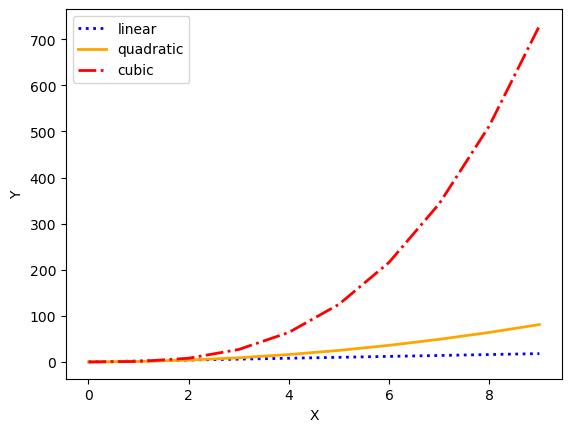

In [18]:
fig, ax = plt.subplots()  
x = np.arange(10)
y = x * 2
ax.plot(x, y, label='linear', color='blue', linewidth=2, linestyle=':')  

y2 = x ** 2
ax.plot(x, y2, label='quadratic',color='orange', linewidth=2, linestyle='-') 

y3 = x ** 3
ax.plot(x, y3, label='cubic',color='red', linewidth=2, linestyle='dashdot')  

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

## multiple plots (Axes) in one figure

When to use multiple plots instead of one

* the two plots are on different scales 
    * linear: range [0,9]
    * cubic: range [0, 800]

How?

* Create a figure containing two axes.

`fig, axes = plt.subplots(1,2)` 

* Create a figure containing four axes.

`fig, axes = plt.subplots(2,2)` (2 rows and 2 columns)

`fig, axes = plt.subplots(1,4)` (1 row and 4 columns)

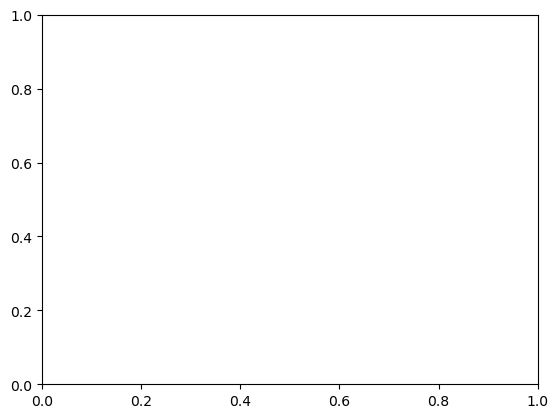

In [19]:
fig, axes = plt.subplots() 

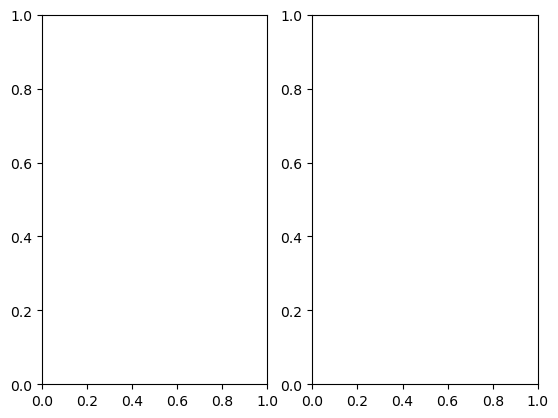

In [20]:
fig, axes = plt.subplots(1,2)  # Create a figure containing two axes.

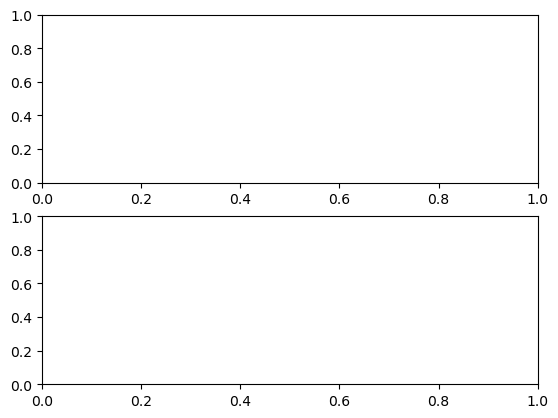

In [21]:
fig, axes = plt.subplots(2,1)

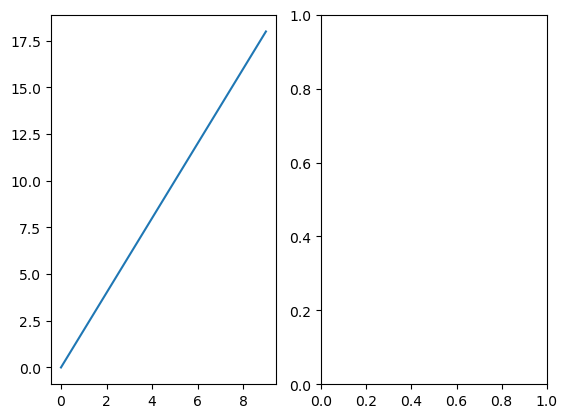

In [22]:
fig, axes = plt.subplots(1,2)  # Create a figure containing two axes.
ax1 = axes[0]
ax1.plot(x,y)

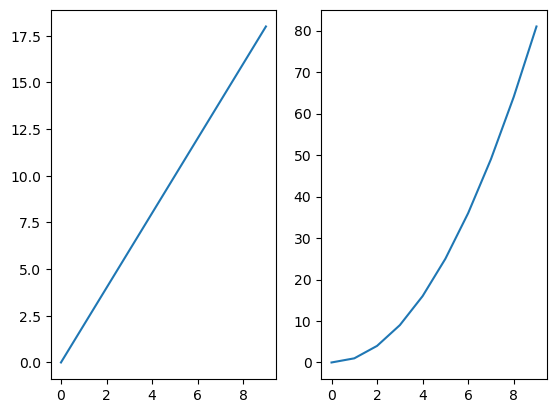

In [23]:
fig, axes = plt.subplots(1,2)  # Create a figure containing two axes.
ax1 = axes[0]
ax1.plot(x,y)

ax2 = axes[1]
ax2.plot(x,x**2)

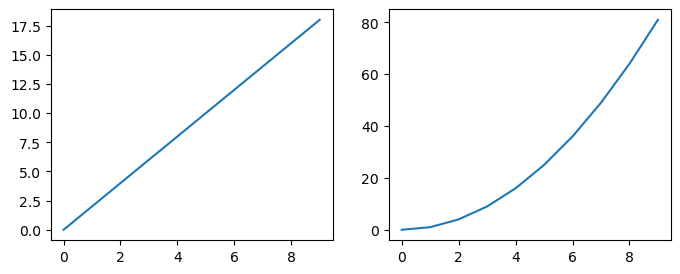

In [24]:
fig, axes = plt.subplots(1,2,figsize=(8,3))  # Create a figure containing two axes.
ax1 = axes[0]
ax1.plot(x,y)

ax2 = axes[1]
ax2.plot(x,x**2)

Text(0.5, 1.0, 'Cubic function')

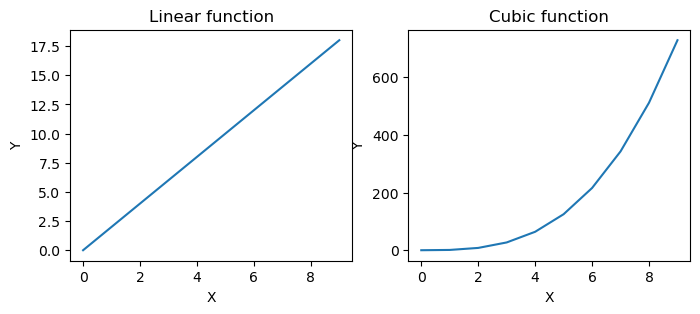

In [25]:
fig, axes = plt.subplots(1,2,figsize=(8,3))  # Create a figure containing two axes.
ax1 = axes[0]
ax1.plot(x,y)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Linear function")

ax2 = axes[1]
ax2.plot(x,x**3)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Cubic function")

Text(0.5, 1.0, 'Cubic function')

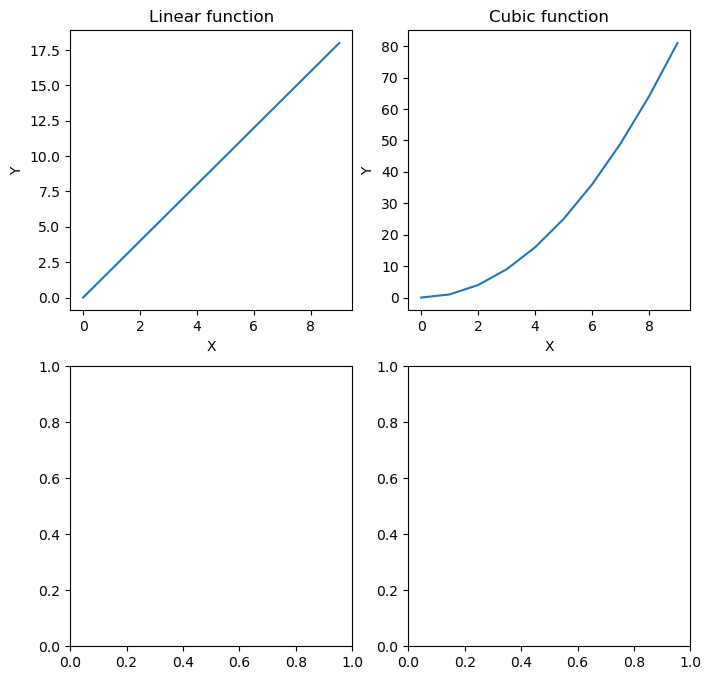

In [26]:
fig, axes = plt.subplots(2,2,figsize=(8,8))  # Create a figure containing two axes.
ax1 = axes[0,0]
ax1.plot(x,y)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Linear function")

ax2 = axes[0,1]
ax2.plot(x,x**2)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Cubic function")


Text(0.5, 1.0, 'Polynomial function')

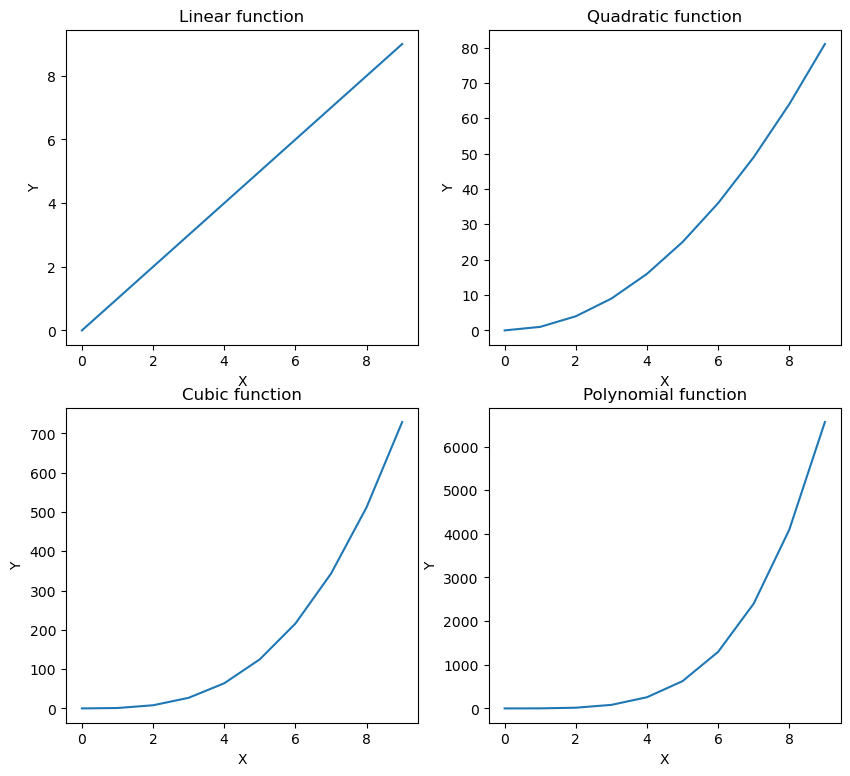

In [27]:
x = np.arange(10)

fig, axes =plt.subplots(2,2 ,figsize=(10,9))  # Create a figure containing four axes.
ax1 = axes[0,0]
ax1.plot(x,x)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Linear function")

ax2 = axes[0,1]
ax2.plot(x,x**2)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Quadratic function")

ax3 = axes[1,0]
ax3.plot(x,x**3)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("Cubic function")

ax4 = axes[1,1]
ax4.plot(x,x**4)
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_title("Polynomial function")

## Scatter plot

`axes.scatter()`

* marker size `s=None`
* marker colors `c=None`
* [marker style](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py) `marker=None`

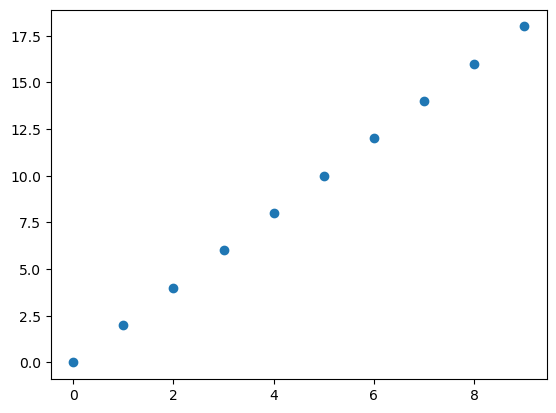

In [28]:
fig, ax = plt.subplots() 
ax.scatter(x,y)

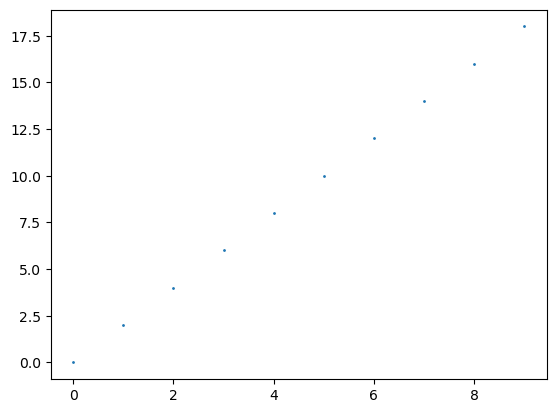

In [29]:
fig, ax = plt.subplots() 
ax.scatter(x,y, s=1)

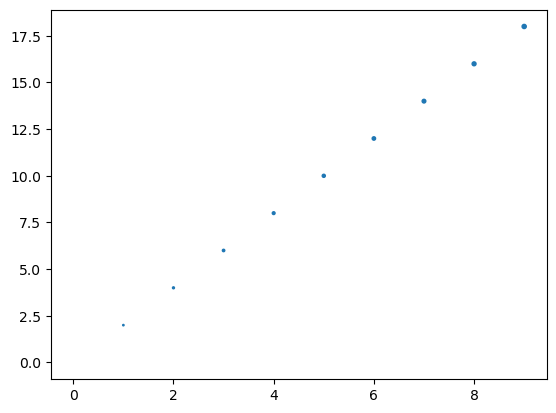

In [30]:
fig, ax = plt.subplots() 
ax.scatter(x,y, s=np.arange(10))

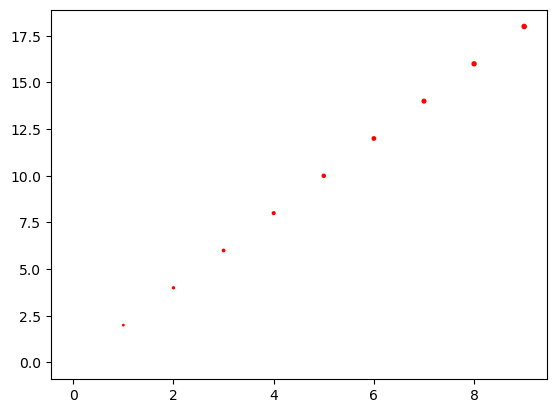

In [31]:
fig, ax = plt.subplots() 
ax.scatter(x,y, s=np.arange(10),c="red")

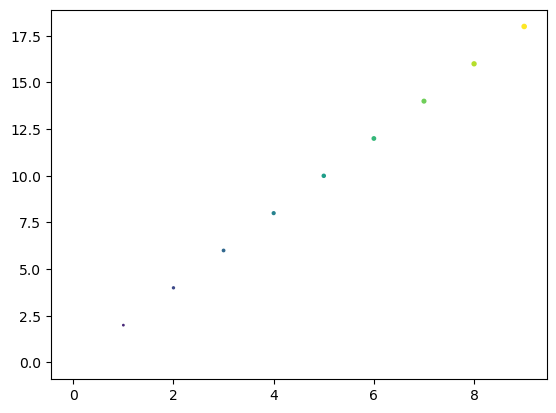

In [32]:
fig, ax = plt.subplots() 
ax.scatter(x,y, s=np.arange(10),c=np.arange(10))

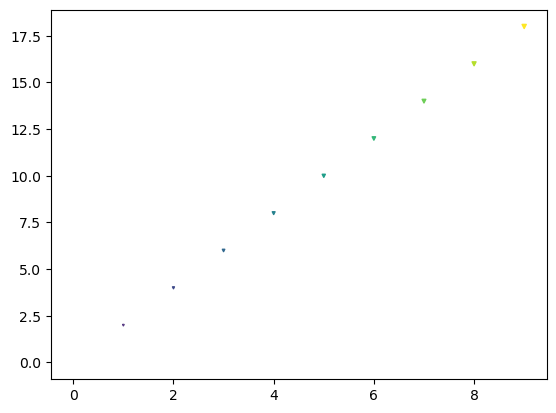

In [33]:
fig, ax = plt.subplots() 
ax.scatter(x,y, s=np.arange(10),c=np.arange(10), marker="v")

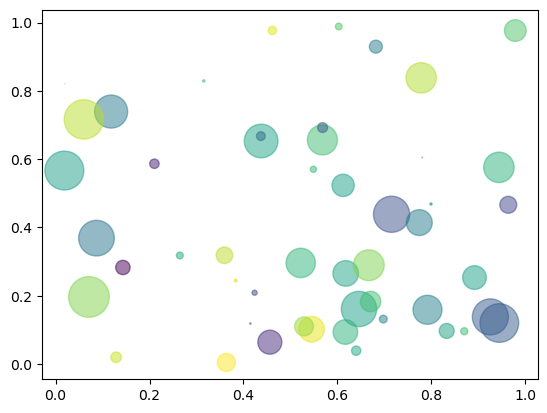

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(0)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
fig, ax = plt.subplots() 
ax.scatter(x, y, s=area, c=colors, alpha=0.5)

## bar plot for categorical variables

`axes.bar()`: a vertical bar plot.

`axes.barh()`: a horizontal bar plot.

<BarContainer object of 3 artists>

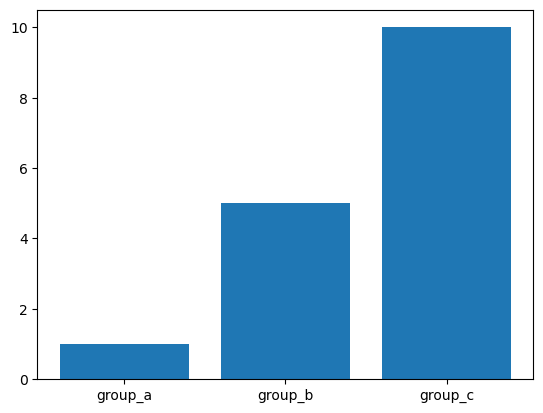

In [35]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 5, 10]
fig, ax = plt.subplots() 
ax.bar(names, values)

<BarContainer object of 3 artists>

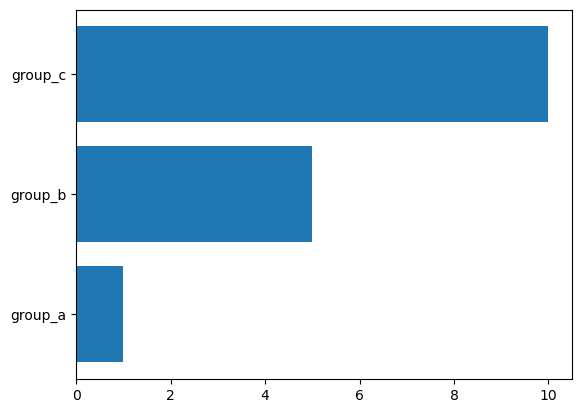

In [36]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 5, 10]
fig, ax = plt.subplots() 
ax.barh(names, values)

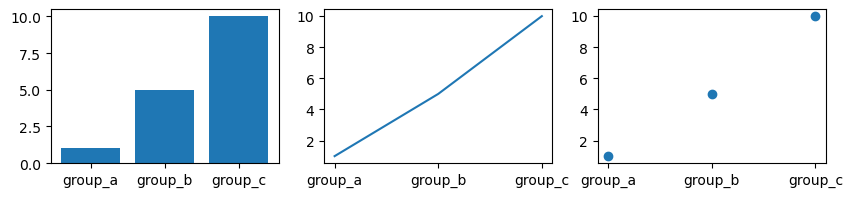

In [37]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 5, 10]
fig, axes = plt.subplots(1,3, figsize=(10,2)) 
axes[0].bar(names, values)
axes[1].plot(names, values)
axes[2].scatter(names, values)

## Distributions and Densities

In [38]:
import numpy as np

x = np.random.normal(1,1,100)

In [39]:
x

array([ 2.12663592e+00, -7.99315084e-02, -1.47468652e-01,  5.62179955e-01,
        5.01967549e-01,  2.92953205e+00,  1.94942081e+00,  1.08755124e+00,
       -2.25435519e-01,  1.84436298e+00, -2.15347390e-04, -5.44771097e-01,
        2.18802979e+00,  1.31694261e+00,  1.92085882e+00,  1.31872765e+00,
        1.85683061e+00,  3.48974407e-01, -3.42428418e-02,  1.68159452e+00,
        1.96590336e-01,  3.10450222e-01,  5.44467496e-01,  1.01747916e+00,
        6.46006089e-01, -3.74951293e-01,  3.56381597e-01, -1.22340315e+00,
        1.62523145e+00, -6.02057656e-01, -1.04383339e-01,  1.05216508e+00,
        2.60437004e-01,  2.54301460e+00, -2.92856910e-01,  1.26705087e+00,
        9.60717182e-01, -1.68093498e-01,  1.52327666e+00,  8.28453669e-01,
        1.77179055e+00,  1.82350415e+00,  3.16323595e+00,  2.33652795e+00,
        6.30818162e-01,  7.60620822e-01,  2.09965960e+00,  1.65526373e+00,
        1.64013153e+00, -6.16956044e-01,  9.75673876e-01,  2.61969091e-01,
        1.27992460e+00,  

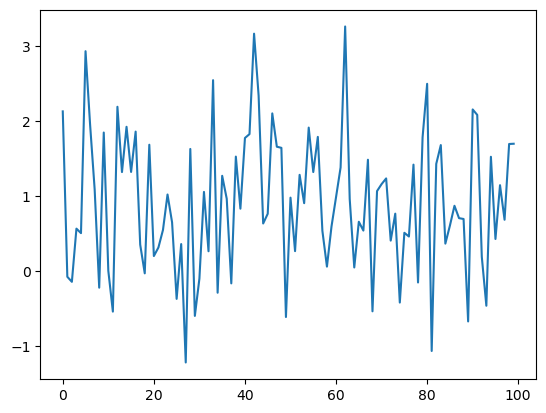

In [40]:
fig, ax = plt.subplots() 
ax.plot(x)

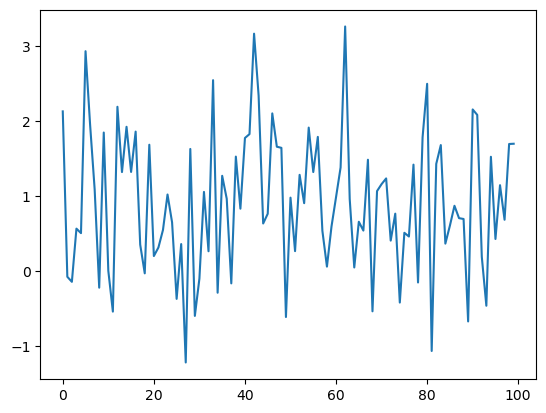

In [41]:
fig, ax = plt.subplots() 
ax.plot(np.arange(100),x)

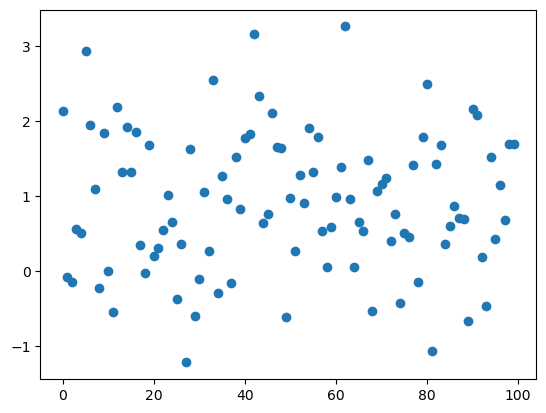

In [42]:
fig, ax = plt.subplots() 
ax.scatter(np.arange(100),x)

(array([ 2.,  8., 11., 17., 18., 14., 17.,  8.,  2.,  3.]),
 array([-1.22340315, -0.77513194, -0.32686073,  0.12141048,  0.56968169,
         1.0179529 ,  1.46622411,  1.91449532,  2.36276653,  2.81103774,
         3.25930895]),
 <BarContainer object of 10 artists>)

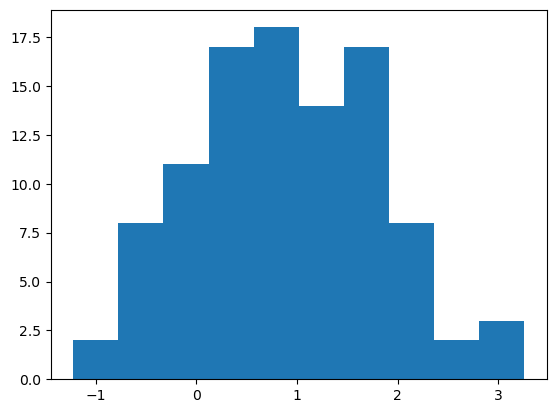

In [43]:
fig, ax = plt.subplots() 
ax.hist(x)

(array([0.04461585, 0.17846339, 0.24538716, 0.3792347 , 0.40154263,
        0.31231093, 0.3792347 , 0.17846339, 0.04461585, 0.06692377]),
 array([-1.22340315, -0.77513194, -0.32686073,  0.12141048,  0.56968169,
         1.0179529 ,  1.46622411,  1.91449532,  2.36276653,  2.81103774,
         3.25930895]),
 <BarContainer object of 10 artists>)

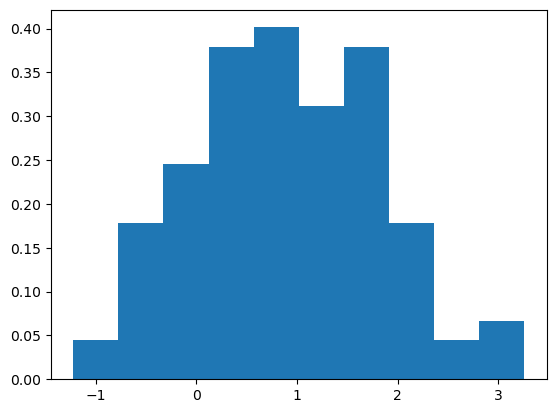

In [44]:
fig, ax = plt.subplots() 
ax.hist(x, density=True)

In [45]:
ax.hist?

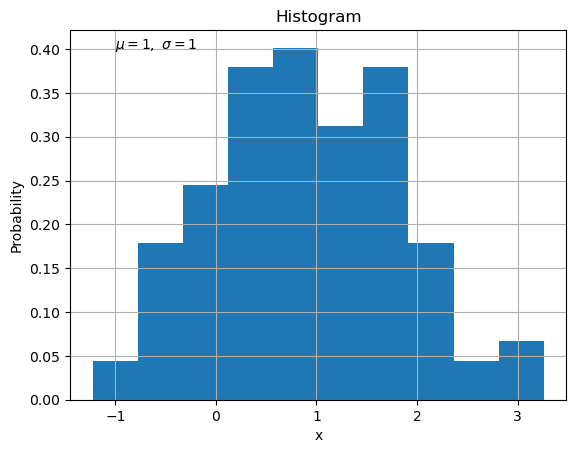

In [46]:
fig, ax = plt.subplots() 
ax.hist(x, density=True)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Histogram')
ax.text(-1, .4, r'$\mu=1,\ \sigma=1$')
ax.grid(True)

## Image plotting

`ax.imshow`

In [47]:
image = np.eye(100)
image

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

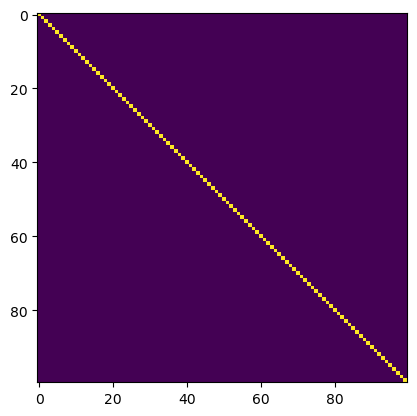

In [48]:
fig, ax = plt.subplots() 
ax.imshow(image)

In [49]:
dim = 50
x_coords, y_coords = np.meshgrid(range(dim), range(dim), indexing='ij')
beta_low = np.zeros((dim,dim))
for i in range(x_coords.shape[0]):
    for j in range(x_coords.shape[1]):
        x = x_coords[i,j]
        y = y_coords[i,j]
        beta_low[i,j] = 1 + 1/24*(i+j)

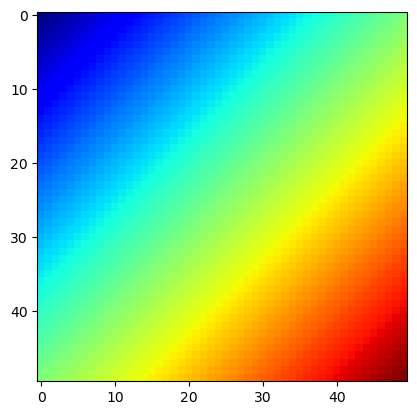

In [50]:
fig, ax = plt.subplots() 
ax.imshow(beta_low,cmap="jet")

## Saving a figure

`plt.savefig()`

Save the current figure.

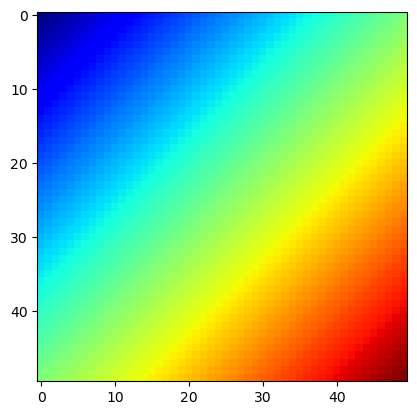

In [51]:
fig, ax = plt.subplots() 
ax.imshow(beta_low,cmap='jet')
plt.savefig("image.png")

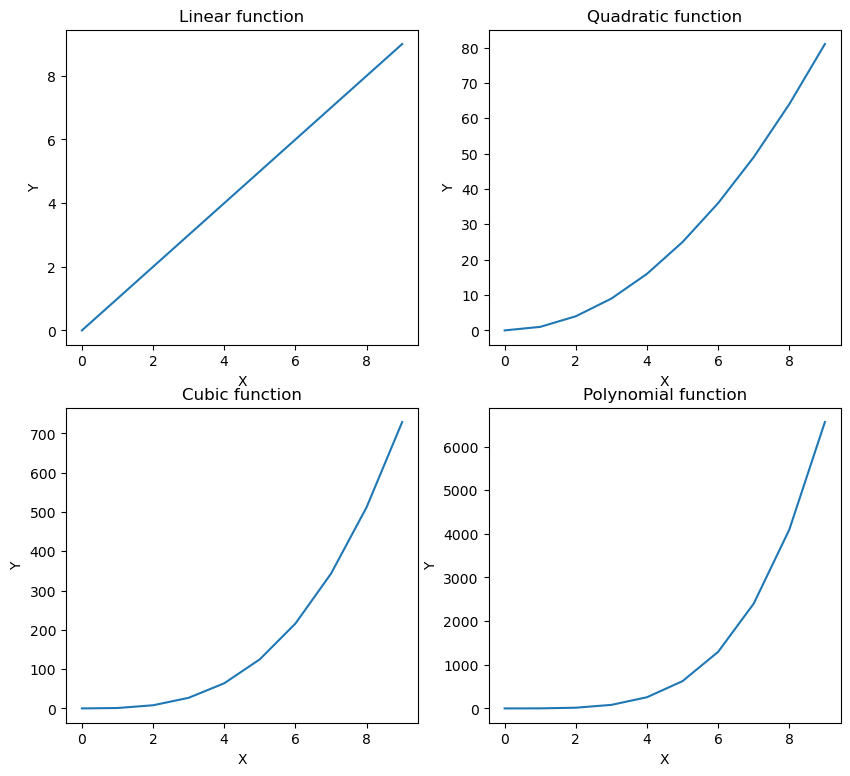

In [52]:
x = np.arange(10)

fig, axes = plt.subplots(2,2,figsize=(10,9))  # Create a figure containing four axes.
ax1 = axes[0,0]
ax1.plot(x,x)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Linear function")

ax2 = axes[0,1]
ax2.plot(x,x**2)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Quadratic function")

ax3 = axes[1,0]
ax3.plot(x,x**3)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("Cubic function")

ax4 = axes[1,1]
ax4.plot(x,x**4)
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_title("Polynomial function")

plt.savefig("functions_4.png",dpi=500)

There is a lot more to matplotlib. One can visit the [gallery](https://matplotlib.org/stable/gallery/index.html) and pull examples in to get a sense of what is possible, and how to adapt examples for your own purposes.